In [11]:
!pip3 install PyObjC

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.7/755.7 kB 447.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 366.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 391.0/391.0 kB 478.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 238.2 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 328.4 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 513.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 233.7 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.2 MB/s eta 0:00:00


In [12]:
import os                   # Pathname manipulation
import glob                 # For pattern matching of pathnames
import time                 # Provides functions related to time values
import random               # To generate random numbers
import re                   # Regular expressions
from tqdm import tqdm       # Used for creating Progress Meters or Progress Bars ('taqaddum' in arabic for progress)
# Module provides additional data structures for collections of data like defaultdict, ordereddict, counter, Deque, Namedtuple, Chainmap
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

# PIL - Python Imaging Library, adds many image processing features
from PIL import Image
from skimage import io

from sklearn.model_selection import train_test_split 

#model building 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.translate.bleu_score import sentence_bleu
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image, sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop 
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import add
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras import Input, layers
from keras import optimizers

from gtts import gTTS
from playsound import playsound
from IPython import display
import cv2


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srisaijishnuedara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Importing the dataset and reading the image into a seperate variable

images_folder_path = '/Users/srisaijishnuedara/Documents/SEMESTER_6/DIP_PROJECT/DATASET/Images'  
# alternative code> images_folder_path = os.path.join('/','kaggle','input','flickr8k','Images')

captions_file_path = '/Users/srisaijishnuedara/Documents/SEMESTER_6/DIP_PROJECT/DATASET/captions.txt'
# alternative code> captions_file_path = '/kaggle/input/flickr8k/captions.txt'

working_folder_path = '/Users/srisaijishnuedara/Documents/SEMESTER_6/DIP_PROJECT/Results'

# Creating a list which contains the path to the images
all_imgs_path_list = glob.glob(images_folder_path + '/*.jpg',recursive=True) 
print("The total images present in the dataset: ", len(all_imgs_path_list))

The total images present in the dataset:  8091


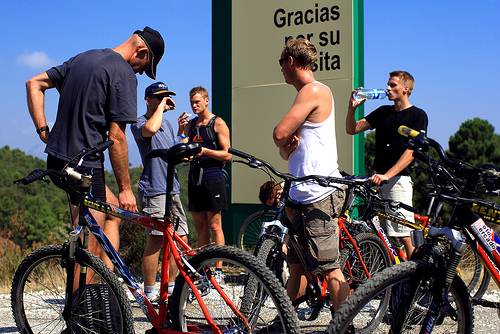

In [14]:
#Visualising both the images & text present in the dataset

# Visualizing a random image
# Random image index
random_img_index = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
Image.open(all_imgs_path_list[random_img_index])

In [15]:
#Importing the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    text=open(filename).read()
    return text

doc = load_doc(captions_file_path)
print(doc[:500])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .
1001773457_577c3a7d70.jpg,A black dog and a spotted dog are fighting
1001773457_577c3


In [16]:
captions_df = pd.read_csv(captions_file_path) # Creating a captions dataframe with comma seperated values of images & captions 

print("Total captions present in the dataset: ", len(list(captions_df.caption)))
print("Total images present in the dataset: ",len(all_imgs_path_list))

captions_df.head()

Total captions present in the dataset:  40455
Total images present in the dataset:  8091


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


Each image id has 5 captions associated with it therefore the total dataset should have 8091x5 = 40455 samples.

In [17]:
all_img_id = list(captions_df.image)    # store all the image id here as list
all_img_vector = all_imgs_path_list     # store all the image path here as list
annotations = list(captions_df.caption) # store all the captions here as list

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['Image-ID','Path', 'Captions']) 
# df is dataframe containing image-id, image path and caption    
df.head(10)

,Image-ID,Path,Captions
0,1000268201_693b08cb0e.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A little girl in a pink dress going into a woo...
5,1001773457_577c3a7d70.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A black dog and a spotted dog are fighting
6,1001773457_577c3a7d70.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A black dog and a tri-colored dog playing with...
7,1001773457_577c3a7d70.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,A black dog and a white dog with brown spots a...
8,1001773457_577c3a7d70.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,Two dogs of different breeds looking at each o...
9,1001773457_577c3a7d70.jpg,/Users/srisaijishnuedara/Documents/SEMESTER_6/...,Two dogs on pavement moving toward each other .


In [18]:
# Adding the <start> & <end> token to all those captions as well

start_token = '<start>'
end_token = '<end>'

image_path_to_caption = defaultdict(list) # Dictionary with key: image id, values: list of 5 captions 

for idx, row in captions_df.iterrows():
    caption = f'{start_token} {row.caption} {end_token}' # adding <start> & <end> token for each caption
    image_path = os.path.join(images_folder_path,row.image) # image_path contains list of image paths
    image_path_to_caption[image_path].append(caption) # Generates dictionary of image_path: caption

In [19]:
image_path_to_caption

defaultdict(list,
            {'/Users/srisaijishnuedara/Documents/SEMESTER_6/DIP_PROJECT/DATASET/Images/1000268201_693b08cb0e.jpg': ['<start> A child in a pink dress is climbing up a set of stairs in an entry way . <end>',
              '<start> A girl going into a wooden building . <end>',
              '<start> A little girl climbing into a wooden playhouse . <end>',
              '<start> A little girl climbing the stairs to her playhouse . <end>',
              '<start> A little girl in a pink dress going into a wooden cabin . <end>'],
             '/Users/srisaijishnuedara/Documents/SEMESTER_6/DIP_PROJECT/DATASET/Images/1001773457_577c3a7d70.jpg': ['<start> A black dog and a spotted dog are fighting <end>',
              '<start> A black dog and a tri-colored dog playing with each other on the road . <end>',
              '<start> A black dog and a white dog with brown spots are staring at each other in the street . <end>',
              '<start> Two dogs of different breeds look

['<start> a man in a black hat standing in front of a brick wall and a sign <end>', '<start> A man in a knit cap stands next to a brick wall . <end>', '<start> A man standing in front of a brick building . <end>', '<start> Man wearing black shirt standing in front of a red brick wall . <end>', '<start> The man in the black hat has his back to a theater sign . <end>']


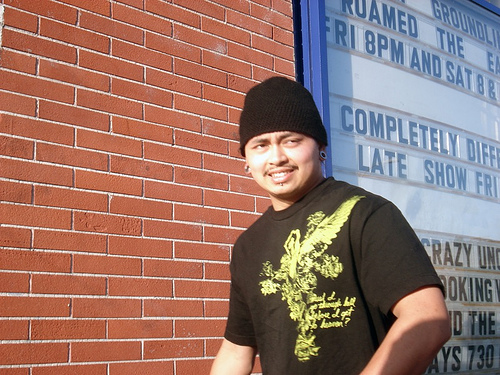

In [20]:
# Visualizing a random image and its captions

image_num = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
print(list(image_path_to_caption.values())[image_num])
Image.open(list(image_path_to_caption.keys())[image_num])

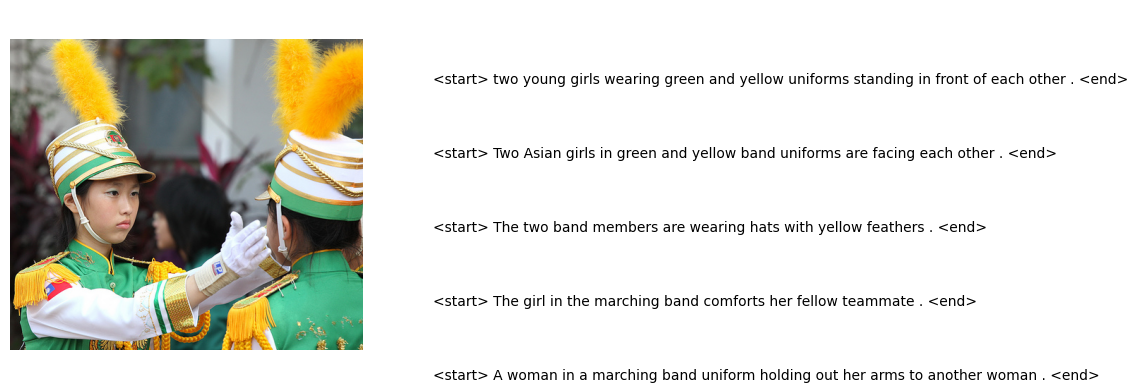

In [21]:
# Visualizing image and corresponding captions

img_path_from_dict = list(image_path_to_caption.keys())
all_captions = []  # Caption list containing captions with start & end token for all the images
img_name_vector = [] # Creating image path list (ordered based on caption sets of 5, captions with start & end token)

for img_path in img_path_from_dict:
    
    # Caption list containing 5 captions with start & end token corresponding to a single image
    caption_list = image_path_to_caption[img_path] 
    
    # Caption list containing captions with start & end token for all images
    all_captions.extend(caption_list)
    
    # Creating image path list (ordered based on caption sets of 5, captions with start & end token)
    img_name_vector.extend([img_path] * len(caption_list))

# random image index 
image_num = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
image_num = image_num//5
image_num = image_num*5

f, axes = plt.subplots(1, 2)
plt.axis('off')
f.set_figwidth(10)
axes[0].imshow(io.imread(img_name_vector[image_num]))
axes[0].axis('off')
axes[1].set_ylim(0,5)
for i in range(0,5):
    axes[1].text(0,i,all_captions[i+image_num])

In [22]:
# Creating the vocabulary & the counter for the captions

vocabulary= [word.lower() for line in annotations for word in line.split()]

val_count=Counter(vocabulary)

In [23]:
val_count

Counter({'a': 62986,
         '.': 36577,
         'in': 18974,
         'the': 18418,
         'on': 10743,
         'is': 9345,
         'and': 8851,
         'dog': 8136,
         'with': 7765,
         'man': 7265,
         'of': 6713,
         'two': 5638,
         'white': 3940,
         'black': 3832,
         'boy': 3581,
         'are': 3504,
         'woman': 3402,
         'girl': 3328,
         ',': 3232,
         'to': 3173,
         'wearing': 3062,
         'at': 2914,
         'people': 2883,
         'water': 2783,
         'red': 2672,
         'young': 2630,
         'brown': 2563,
         'an': 2432,
         'his': 2357,
         'blue': 2268,
         'dogs': 2125,
         'running': 2073,
         'through': 2032,
         'playing': 2008,
         'while': 1968,
         'down': 1825,
         'shirt': 1806,
         'standing': 1787,
         'ball': 1779,
         'little': 1768,
         'grass': 1622,
         'child': 1545,
         'person': 1542,
      

       Word  Count
0         a  62986
1         .  36577
2        in  18974
3       the  18418
4        on  10743
5        is   9345
6       and   8851
7       dog   8136
8      with   7765
9       man   7265
10       of   6713
11      two   5638
12    white   3940
13    black   3832
14      boy   3581
15      are   3504
16    woman   3402
17     girl   3328
18        ,   3232
19       to   3173
20  wearing   3062
21       at   2914
22   people   2883
23    water   2783
24      red   2672
25    young   2630
26    brown   2563
27       an   2432
28      his   2357
29     blue   2268


Text(0, 0.5, 'Count')

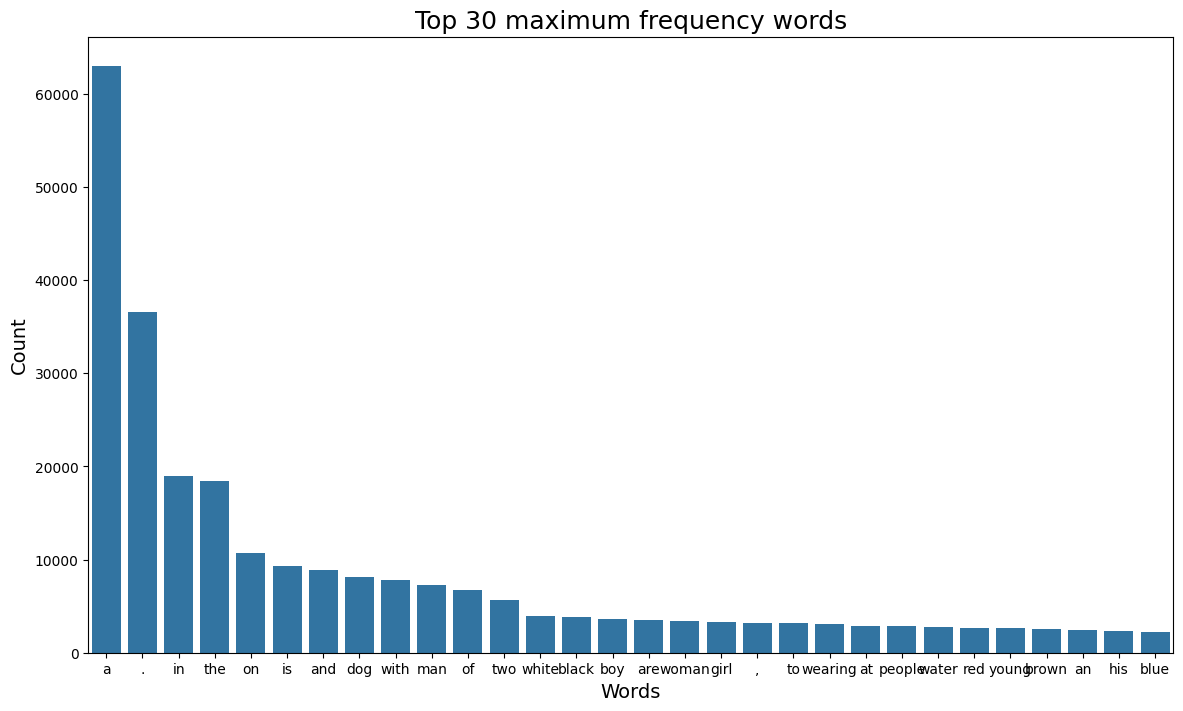

In [24]:
# Visualising the top 30 occuring words in the captions

top30_words_countwise = val_count.most_common(30)
top30_words_df = pd.DataFrame(top30_words_countwise, columns = ['Word', 'Count'])
print(top30_words_df)

fig = plt.figure(figsize=(14,8))
sns.barplot(x='Word', y='Count', data = top30_words_df)
plt.title("Top 30 maximum frequency words", fontsize = 18)
plt.xlabel("Words", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

Pre-processing the captions¶
1.Creating the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. This gives a vocabulary of all of the unique words in the data. The total vocaublary is set to top 5,000 words for saving memory.

2.Replacing all other words with the unknown token "UNK" .

3.Creating word-to-index and index-to-word mappings.

4.Padding all sequences to be the same length as the longest one.

In [25]:
# creating the tokenizer

# Top 5000 words
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
# annotations =  list of all captions 
# fit_on_texts >> Updates internal vocabulary based on a list of texts, in case of texts containing lists, each entry of the lists is assumed to be a token.
# Required before using `texts_to_sequences`
tokenizer.fit_on_texts(all_captions) 
# Transforms each text in texts to a sequence of integers
tokenized_text_sequence = tokenizer.texts_to_sequences(all_captions)
tokenized_text_sequence[:5]

[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4]]

In [26]:
# Creating word-to-index and index-to-word mappings.

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
tokenized_text_sequence = tokenizer.texts_to_sequences(all_captions)
tokenized_text_sequence[:5]


[[3, 2, 44, 5, 2, 91, 173, 8, 120, 52, 2, 394, 13, 395, 5, 29, 1, 671, 4],
 [3, 2, 20, 317, 65, 2, 197, 118, 4],
 [3, 2, 41, 20, 120, 65, 2, 197, 2438, 4],
 [3, 2, 41, 20, 120, 6, 395, 21, 61, 2438, 4],
 [3, 2, 41, 20, 5, 2, 91, 173, 317, 65, 2, 197, 2982, 4]]

In [27]:
random_index = np.random.randint(low=0, high=len(all_imgs_path_list)-1, size=None, dtype=int)
print(all_captions[random_index])
print(tokenized_text_sequence[random_index])

<start> Two parents with two children and others dressed up like the music group Kiss . <end>
[3, 14, 1988, 11, 14, 63, 9, 286, 108, 52, 413, 6, 908, 59, 1038, 4]


In [28]:
# Creating a word count of your tokenizer to visulize the Top 30 occuring words after text processing

dict_word_count = tokenizer.word_counts

In [29]:
dict_word_count

OrderedDict([('<start>', 40455),
             ('a', 62992),
             ('child', 1545),
             ('in', 18986),
             ('pink', 739),
             ('dress', 348),
             ('is', 9345),
             ('climbing', 507),
             ('up', 1302),
             ('set', 109),
             ('of', 6723),
             ('stairs', 109),
             ('an', 2432),
             ('entry', 1),
             ('way', 53),
             ('<end>', 40455),
             ('girl', 3328),
             ('going', 149),
             ('into', 1074),
             ('wooden', 284),
             ('building', 510),
             ('little', 1768),
             ('playhouse', 6),
             ('the', 18419),
             ('to', 3176),
             ('her', 1178),
             ('cabin', 4),
             ('black', 3848),
             ('dog', 8138),
             ('and', 8862),
             ('spotted', 38),
             ('are', 3504),
             ('fighting', 133),
             ('tri', 14),
             ('color

       Word  Count
0         a  62992
1   <start>  40455
2     <end>  40455
3        in  18986
4       the  18419
5        on  10745
6        is   9345
7       and   8862
8       dog   8138
9      with   7765
10      man   7274
11       of   6723
12      two   5642
13    white   3959
14    black   3848
15      boy   3581
16      are   3504
17    woman   3402
18     girl   3328
19       to   3176
20  wearing   3062
21       at   2915
22   people   2883
23    water   2790
24      red   2691
25    young   2630
26    brown   2578
27       an   2432
28      his   2357
29     blue   2279


Text(0, 0.5, 'Count')

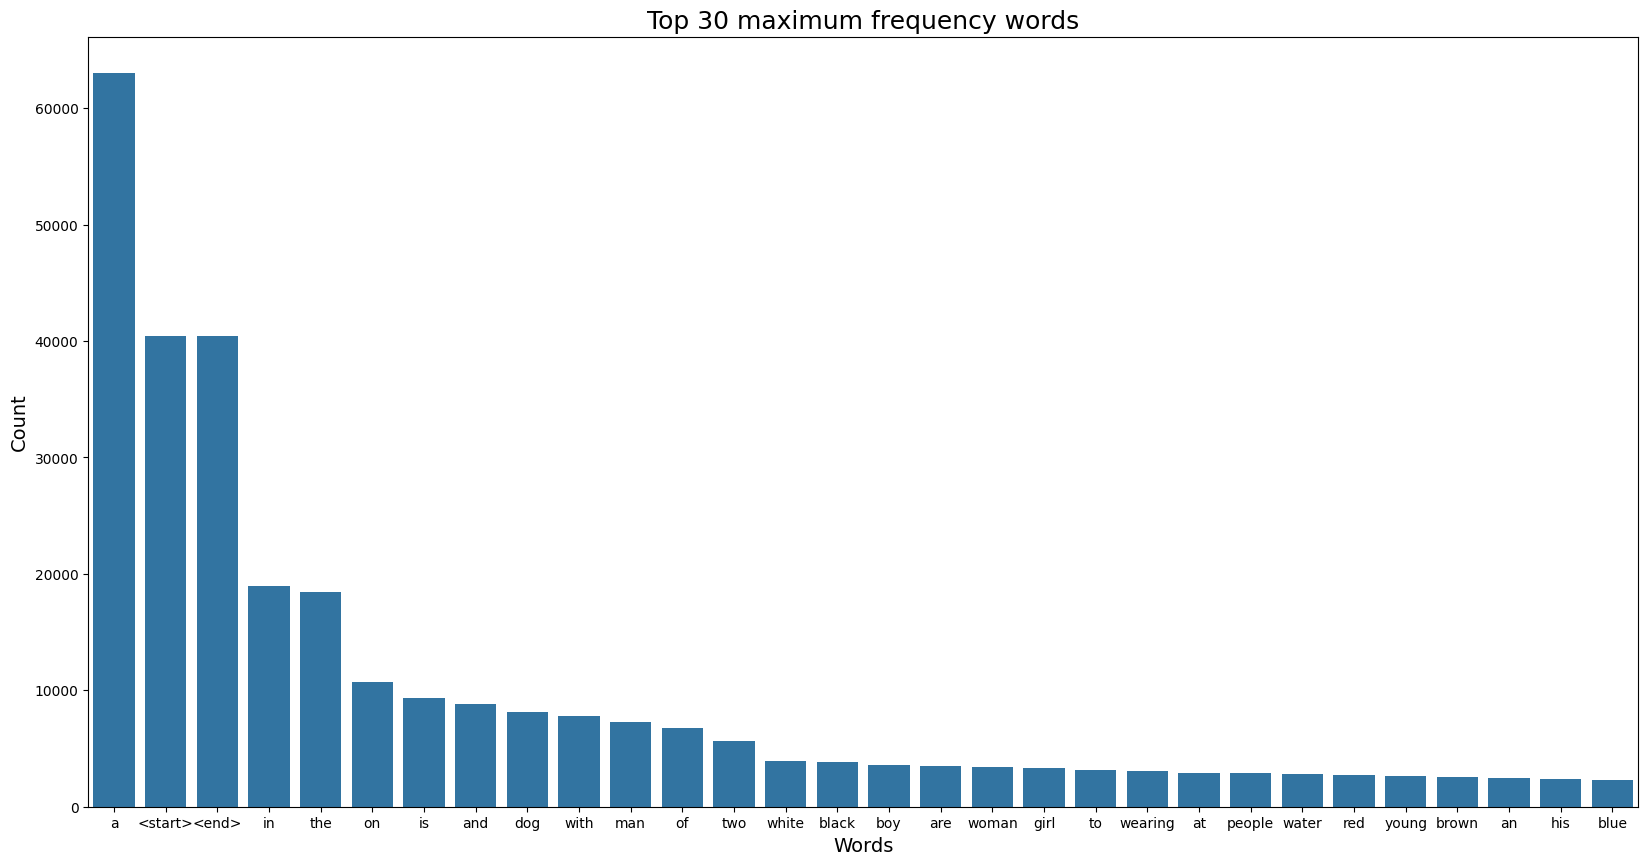

In [30]:
# Visualising the top 30 occuring words in the captions after text processing

tokenized_word_count = sorted(tokenizer.word_counts.items(), key=lambda x:x[1], reverse=True)
tokenized_word_count_df = pd.DataFrame(tokenized_word_count, columns = ['Word', 'Count'])
top30_tokenized_words_df = tokenized_word_count_df.iloc[0:30,:]
print(top30_tokenized_words_df)

fig = plt.figure(figsize=(20,10))
sns.barplot(x='Word', y='Count', data = top30_tokenized_words_df)
plt.title("Top 30 maximum frequency words", fontsize = 18)
plt.xlabel("Words", fontsize = 14)
plt.ylabel("Count", fontsize = 14)

In [31]:
# all_captions - all captions list including start & end token
all_tokenized_text_sequence = tokenizer.texts_to_sequences(all_captions) 

max_length_caption = max(len(i) for i in all_tokenized_text_sequence)
print('Maximum length of any caption in the dataset: ', max_length_caption)

Maximum length of any caption in the dataset:  39


In [32]:
# Padding each vector to the max_length of the captions ^ store it to a vairable

cap_vector = tf.keras.preprocessing.sequence.pad_sequences(all_tokenized_text_sequence, padding = 'post',maxlen = max_length_caption)

print("The shape of Caption vector is :" + str(cap_vector.shape))
cap_vector[1:3,:]

The shape of Caption vector is :(40455, 39)


array([[   3,    2,   20,  317,   65,    2,  197,  118,    4,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   3,    2,   41,   20,  120,   65,    2,  197, 2438,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int32)

Pre-processing the images¶
Resizing the image to the shape of (299, 299)
Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. #### Note on resizing the images:
Since the list contains all the image path, we first convert them to a dataset using tf.data.Dataset.from_tensor_slices. Once the dataset is created, consisting of image paths, we apply a function to the dataset which will apply the necessary preprocessing to each image.
This function would resize them and also do the necessary preprocessing correct format of InceptionV3.

In [41]:
# Creating the function which returns images & their path

def load_image(image_path):
    #write your pre-processing steps here
    preprocessed_img = tf.io.read_file(image_path)
    preprocessed_img = tf.image.decode_jpeg(preprocessed_img, channels=3)
    preprocessed_img = tf.image.resize(preprocessed_img, (299, 299))
    # tf.keras.applications.inception_v3.preprocess_input will normalize input to range of -1 to 1
    preprocessed_img = tf.keras.applications.inception_v3.preprocess_input(preprocessed_img)
    return preprocessed_img, image_path

In [42]:
# Applying the function to the image path dataset, such that the transformed dataset would contain images & their path

encode_train_set = sorted(set(img_name_vector))    # img_name_vector - path list of all images according to caption set with start & end token

image_data_set = tf.data.Dataset.from_tensor_slices(encode_train_set)
image_data_set = image_data_set.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(32)
image_data_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

Extracting the Feature vector
Loading the pretrained Imagenet weights of Inception net V3
1.To save the memory(RAM) from getting exhausted, we extract the features of the images using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048.

3.Using a function to extract the features of each image in the train & test dataset such that the shape of each image would be (batch_size, 8*8, 2048)

Note on storing the features:
We can store the features using a dictionary with the path as the key and the feature extracted by the inception net v3 model as values. OR
We can store using numpy(np.save) to store the resulting vector.

In [43]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input                    #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output     #write code here to get the output of the image_model

image_features_extract_model = keras.Model(new_input, hidden_layer)   #build the final model using both input & output layer

In [44]:
image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

In [45]:
# Applying the feature_extraction model to earlier created dataset which contained images & their respective paths

feature_dict = {}

# using tqdm for progress bar
for image,path in tqdm(image_data_set):  
    
    # feed images from newly created Dataset above to Inception V3 built above    
    batch_features = image_features_extract_model(image)
    
    # To squeeze out the features in a batch, to reshape features in order of (batch_size, 8*8, 2048)    
    batch_features_reshaped = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
    
    for batch_f, p in zip(batch_features_reshaped, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature] =  batch_f.numpy()

100%|█████████████████████████████████████████| 253/253 [06:43<00:00,  1.59s/it]


In [46]:
image_data_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [119]:
firstkey = next(iter(feature_dict))
firstvalue = feature_dict[firstkey]
print(firstkey)
print(firstvalue)

/Users/srisaijishnuedara/Documents/SEMESTER_6/DIP_PROJECT/DATASET/Images/1000268201_693b08cb0e.jpg
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.16987093]
 [0.         0.         1.0105928  ... 0.         0.         0.06111753]
 ...
 [0.         0.         2.0380425  ... 1.2029668  0.         1.9924134 ]
 [0.         0.         0.9046867  ... 0.         0.         0.        ]
 [0.         1.2527261  0.         ... 0.         0.         0.        ]]


In [47]:
batch_features

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.74654895e-02, 0.00000000e+00, ...,
          2.31836736e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07786268e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.94035918e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85753152e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.42662805e-02, 0.00000000e+00, 5.05789459e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.23006684e-01, 1.34459585e-02, ...,
          2.33668655e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [48]:
batch_features_reshaped

<tf.Tensor: shape=(27, 64, 2048), dtype=float32, numpy=
array([[[0.00000000e+00, 7.74654895e-02, 0.00000000e+00, ...,
         2.31836736e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.07786268e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.94035918e-01, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.85753152e-01],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.65693474e+00, 0.00000000e+00],
        [0.00000000e+00, 4.02612120e-01, 0.00000000e+00, ...,
         0.00000000e+00, 3.17920297e-01, 0.00000000e+00],
        [0.00000000e+00, 2.53475523e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.25060070e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 7.84931481e-02, ...,
         1.20641971e+00, 0.

In [49]:
print('Shape of batch_features - ',batch_features.shape)
print('Shape of batch_features_reshaped - ',batch_features_reshaped.shape)
print('Shape of feature extracted for an image',batch_f.shape)

Shape of batch_features -  (27, 8, 8, 2048)
Shape of batch_features_reshaped -  (27, 64, 2048)
Shape of feature extracted for an image (64, 2048)


Model Building¶

Data preperation
Applying train_test_split on both image path & captions to create the train & test list. Creating the train-test spliit using 80-20 ratio & random state = 42
Creating a function which maps the image path to their feature.
Creating a builder function to create train & test dataset & apply the function created earlier to transform the dataset
Shuffle the batch while building the dataset
The shape of each image in the dataset after building would be (batch_size, 8*8, 2048)
The shape of each caption in the dataset after building would be(batch_size, max_len)
Note on loading the features:
We can load the features using the dictionary created earlier. OR
We can store using numpy(np.load) to load the feature vector.

In [50]:
# Applying train_test_split on both image path & captions to create the train & test list. 
# Creating the train-test spliit using 80-20 ratio & random state = 42

path_train, path_test, cap_train, cap_test = train_test_split(img_name_vector, cap_vector, test_size=0.2, random_state=42)
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(cap_train)))
print("Testing data for Captions: " + str(len(cap_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [51]:
# Creating a function which maps the image path to their feature. 
# This function will take the image_path & caption and return it's feature & respective caption.

def map_func(image_name,capt):     
  image_tensor = feature_dict[image_name.decode('utf-8')]    # Code to extract the features from the dictionary stored earlier
  return image_tensor,capt

In [52]:
# creating a builder function to create dataset which takes in the image path & captions as input
# This function would transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BATCH_SIZE = 32
BUFFER_SIZE = 1000
def gen_dataset(images_data, captions_data):
        
    dataset = tf.data.Dataset.from_tensor_slices((images_data, captions_data))
    dataset = dataset.shuffle(BUFFER_SIZE)
 
    dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

    dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    return dataset

In [53]:
train_dataset=gen_dataset(path_train,cap_train)
test_dataset=gen_dataset(path_test,cap_test)

In [54]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,max_len)

(32, 64, 2048)
(32, 39)


In [55]:
# Setting the parameters

embedding_dim = 256 
units = 512
vocab_size = 5001   #top 5,000 words +1
train_num_steps = len(path_train) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE

features_shape = batch_f.shape[1]
attention_features_shape = batch_f.shape[0]

Building the Encoder

In [56]:
class Encoder(Model):
    def __init__(self,embedding_dim):
        super(Encoder, self).__init__()
        self.dense = layers.Dense(embedding_dim)       #build your Dense layer with relu activation
        
    def call(self, features, training=False):
        # extract the features from the image shape: (batch, 8*8, embed_dim)
        features = self.dense(features)
        features = tf.nn.relu(features)
        return features

In [57]:
encoder=Encoder(embedding_dim)

Building the Attention model

In [58]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = layers.Dense(units)       #build Dense layer
        self.W2 = layers.Dense(units)       #build Dense layer
        self.V = layers.Dense(1)            #build final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        
        # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden, 1)  
        
        # build the score funciton to shape: (batch_size, 8*8, units)
        score = keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis)) 
        
        # extract the attention weights with shape: (batch_size, 8*8, 1)
        attention_weights = keras.activations.softmax(self.V(score), axis=1)
        
        #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features 
        
        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)
    
        return context_vector, attention_weights

Building the Decoder

In [60]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units)                # iniitalise the Attention model with units
        self.embed = layers.Embedding(vocab_size, embedding_dim)    # build the Embedding layer     
        self.gru = layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = layers.Dense(self.units)              # build the Dense layer    
        self.d2 = layers.Dense(vocab_size)              # build the Dense layer
        
    def call(self,x,features, hidden):
        #create the context vector & attention weights from attention model
        context_vector, attention_weights = self.attention(features, hidden)
        # embed the input to shape: (batch_size, 1, embedding_dim)
        embed = self.embed(x) 
        # Concatenate the input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) 
        # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output,state = self.gru(embed)
        output = self.d1(output)
        # shape : (batch_size * max_length, hidden_size)
        output = tf.reshape(output, (-1, output.shape[2])) 
        # shape : (batch_size * max_length, vocab_size)
        output = self.d2(output) 
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [61]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [62]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (32, 64, 256)
Predcitions shape from Decoder: (32, 5001)
Attention weights shape from Decoder: (32, 64, 1)


Model training & optimization¶

Set the optimizer & loss object

Create the checkpoint path

Create the training & testing step functions

Create the loss function for the test dataset

In [64]:
LR = 2e-4
optimizer = tf.keras.optimizers.Adam(learning_rate = LR)         #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction='none')   #define the loss object

In [65]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [66]:
checkpoint_path = os.path.join(working_folder_path,'checkpoint')
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [67]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

* While creating the training step for our model, we apply Teacher forcing.¶
* Teacher forcing is a technique where the target/real word is passed as the next input to the decoder instead of previous prediciton.

In [68]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)
            
    avg_loss = (loss/int(target.shape[1]))
    
    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))     
                       
    return loss, avg_loss

* While creating the test step for our model, we pass oour previous prediciton as the next input to the decoder.

In [69]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for i in range(1, target.shape[1]):
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)
            dec_input = tf.expand_dims(target[:, i], 1)

    avg_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    
    return loss, avg_loss

In [70]:
def test_loss_cal(test_dataset):
    total_loss = 0
    
    # Code to get the average loss result on our test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
    avg_test_loss=total_loss/test_num_steps
    
    return avg_test_loss

In [71]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  7%|██▋                                      | 1/15 [11:06<2:35:31, 666.55s/it]

For epoch: 1, the train loss is 1.356, & test loss is 1.136
Time taken for 1 epoch 666.4033131599426 sec

Test loss has been reduced from 100.000 to 1.136


 13%|█████▍                                   | 2/15 [21:33<2:19:20, 643.14s/it]

For epoch: 2, the train loss is 1.052, & test loss is 1.006
Time taken for 1 epoch 626.6335928440094 sec

Test loss has been reduced from 1.136 to 1.006


 20%|████████▏                                | 3/15 [32:13<2:08:21, 641.77s/it]

For epoch: 3, the train loss is 0.961, & test loss is 0.937
Time taken for 1 epoch 639.9964380264282 sec

Test loss has been reduced from 1.006 to 0.937


 27%|██████████▉                              | 4/15 [43:15<1:59:06, 649.65s/it]

For epoch: 4, the train loss is 0.904, & test loss is 0.888
Time taken for 1 epoch 661.57146692276 sec

Test loss has been reduced from 0.937 to 0.888


 33%|█████████████▋                           | 5/15 [54:17<1:49:00, 654.05s/it]

For epoch: 5, the train loss is 0.861, & test loss is 0.848
Time taken for 1 epoch 661.7101380825043 sec

Test loss has been reduced from 0.888 to 0.848


 40%|███████████████▌                       | 6/15 [1:05:14<1:38:18, 655.38s/it]

For epoch: 6, the train loss is 0.824, & test loss is 0.814
Time taken for 1 epoch 657.8472402095795 sec

Test loss has been reduced from 0.848 to 0.814


 47%|██████████████████▏                    | 7/15 [1:16:06<1:27:12, 654.12s/it]

For epoch: 7, the train loss is 0.792, & test loss is 0.784
Time taken for 1 epoch 651.4131767749786 sec

Test loss has been reduced from 0.814 to 0.784


 53%|████████████████████▊                  | 8/15 [1:27:15<1:16:51, 658.72s/it]

For epoch: 8, the train loss is 0.764, & test loss is 0.757
Time taken for 1 epoch 668.4196429252625 sec

Test loss has been reduced from 0.784 to 0.757


 60%|███████████████████████▍               | 9/15 [1:38:00<1:05:26, 654.47s/it]

For epoch: 9, the train loss is 0.739, & test loss is 0.732
Time taken for 1 epoch 645.0061500072479 sec

Test loss has been reduced from 0.757 to 0.732


 67%|██████████████████████████▋             | 10/15 [1:51:22<58:20, 700.01s/it]

For epoch: 10, the train loss is 0.716, & test loss is 0.708
Time taken for 1 epoch 801.8335847854614 sec

Test loss has been reduced from 0.732 to 0.708


 73%|█████████████████████████████▎          | 11/15 [2:04:42<48:43, 730.85s/it]

For epoch: 11, the train loss is 0.694, & test loss is 0.687
Time taken for 1 epoch 800.5870499610901 sec

Test loss has been reduced from 0.708 to 0.687


 80%|████████████████████████████████        | 12/15 [2:17:51<37:25, 748.43s/it]

For epoch: 12, the train loss is 0.673, & test loss is 0.668
Time taken for 1 epoch 788.4919891357422 sec

Test loss has been reduced from 0.687 to 0.668


 87%|██████████████████████████████████▋     | 13/15 [2:31:11<25:28, 764.04s/it]

For epoch: 13, the train loss is 0.654, & test loss is 0.649
Time taken for 1 epoch 799.789458990097 sec

Test loss has been reduced from 0.668 to 0.649


 93%|█████████████████████████████████████▎  | 14/15 [2:44:18<12:50, 770.87s/it]

For epoch: 14, the train loss is 0.635, & test loss is 0.631
Time taken for 1 epoch 786.4947698116302 sec

Test loss has been reduced from 0.649 to 0.631


100%|████████████████████████████████████████| 15/15 [2:57:25<00:00, 709.68s/it]

For epoch: 15, the train loss is 0.618, & test loss is 0.613
Time taken for 1 epoch 786.8467490673065 sec

Test loss has been reduced from 0.631 to 0.613


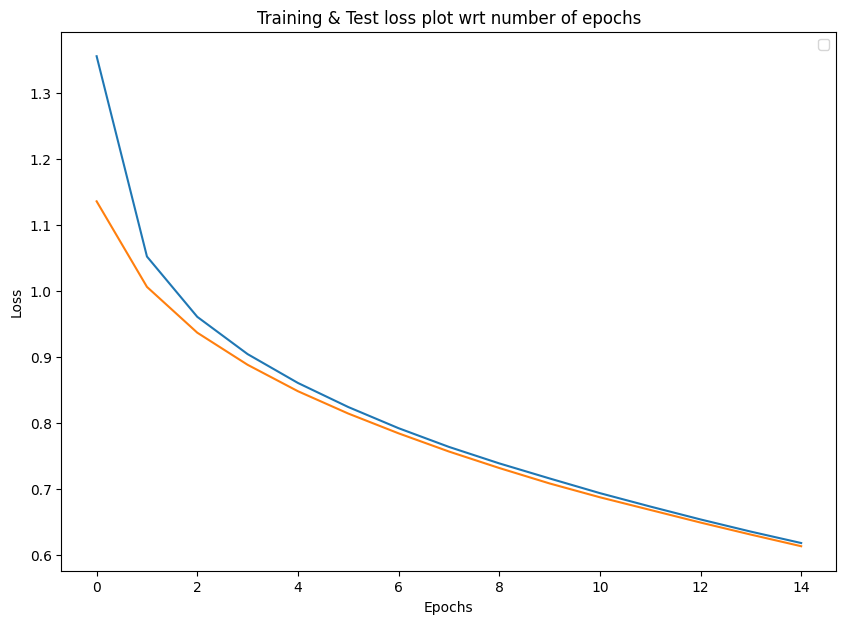

In [72]:
plt.figure(figsize=(10, 7))
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Test loss plot wrt number of epochs')
plt.legend()
plt.show()

Model Evaluation¶

Define the evaluation function using greedy search

Define the evaluation function using beam search

Test it on a sample data using BLEU score

Greedy Search

In [73]:
def evaluate(image):
    attention_plot = np.zeros((max_length_caption, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)  # process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)        # Extracting features using feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)       # extracting the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length_caption):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)    # getting the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
        
        # extract the predicted id(embedded value) which carries the max value
        predicted_id = tf.argmax(predictions[0]).numpy()     
        # map the id to the word from tokenizer and append the value to the result list
        result.append(tokenizer.index_word[predicted_id])
        
        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

Beam Search

In [74]:
def beam_evaluate(image, beam_index = 3):#your value for beam index):
    
    # to evaluate the result using beam search
    start = [tokenizer.word_index['<start>']]
    result = [[start, 0.0]]

    attention_plot = np.zeros((max_length_caption, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)

    while len(result[0][0]) < max_length_caption:
        i=0
        temp = []
        for s in result:
            predictions, hidden, attention_weights = decoder(dec_input, features, hidden)
            attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()
            i=i+1
            word_preds = np.argsort(predictions[0])[-beam_index:]
          
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
            
                prob += np.log(predictions[0][w])
                    
                temp.append([next_cap, prob])
        result = temp
        result = sorted(result, reverse=False, key=lambda l: l[1])
        result = result[-beam_index:]
        
        
        predicted_id = result[-1]
        pred_list = predicted_id[0]
        
        prd_id = pred_list[-1] 
        if(prd_id!=3):
            dec_input = tf.expand_dims([prd_id], 0)  
        else:
            break
    
    
    result2 = result[-1][0]
    
    intermediate_caption = [tokenizer.index_word[i] for i in result2]
    final_caption = []
    for i in intermediate_caption:
        if i != '<end>':
            final_caption.append(i)
            
        else:
            break

    attention_plot = attention_plot[:len(result), :]
    final_caption = ' '.join(final_caption[1:])
    
    return final_caption

In [75]:
def plot_attention_map(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [76]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [99]:
def caption_prediction(autoplay=False, weights=(0.5, 0.5, 0, 0)):
    rid = np.random.randint(0, len(path_test))
    test_image = path_test[rid]
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)
    

    real_caption=filt_text(real_caption)      

    
    pred_caption=' '.join(result).rsplit(' ', 1)[0]

    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    
    score = sentence_bleu(reference, candidate, weights = weights)     #set your weights)
    print(f"BELU score: {score*100}")
    
    print('Real Caption:', real_caption)
    print(f"Prediction Caption: {pred_caption}")
    plot_attention_map(result, attention_plot, test_image)
    
    # we make use of Google Text to Speech API (online), which will convert the caption to audio
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))
    
    return Image.open(test_image)

BELU score: 71.02992180127423
Real Caption: a girl in a pink swimsuit jumps through a water sprinkler
Prediction Caption: a girl in a pink shirt is jumping in a sprinkler


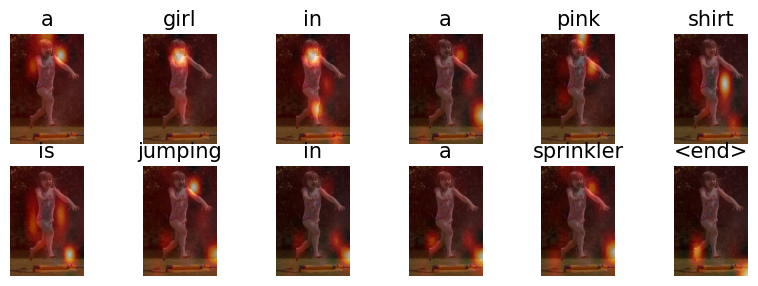

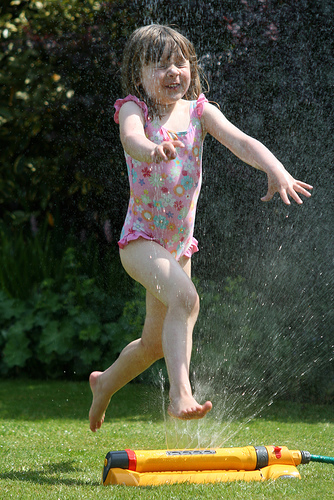

In [114]:
caption_prediction(autoplay=True, weights=(0.25, 0.25, 0, 0))